<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Library python yang dipakai

import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import math
import os #library lokasi path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [53]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi/')
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi/')
print(tidakTerinfeksi_data)

['C38P3thinF_original_IMG_20150621_112043_cell_203.png', 'C38P3thinF_original_IMG_20150621_112116_cell_204.png', 'C38P3thinF_original_IMG_20150621_112116_cell_205.png', 'C38P3thinF_original_IMG_20150621_112138_cell_183.png', 'C38P3thinF_original_IMG_20150621_112246_cell_236.png', 'C39P4thinF_original_IMG_20150622_105102_cell_82.png', 'C39P4thinF_original_IMG_20150622_105102_cell_81.png', 'C39P4thinF_original_IMG_20150622_105102_cell_79.png', 'C39P4thinF_original_IMG_20150622_105102_cell_83.png', 'C39P4thinF_original_IMG_20150622_105102_cell_80.png', 'C39P4thinF_original_IMG_20150622_105102_cell_86.png', 'C39P4thinF_original_IMG_20150622_105102_cell_96.png', 'C39P4thinF_original_IMG_20150622_105102_cell_88.png', 'C39P4thinF_original_IMG_20150622_105102_cell_87.png', 'C39P4thinF_original_IMG_20150622_105102_cell_99.png', 'C39P4thinF_original_IMG_20150622_105102_cell_95.png', 'C39P4thinF_original_IMG_20150622_105102_cell_93.png', 'C39P4thinF_original_IMG_20150622_105102_cell_91.png', 'C39

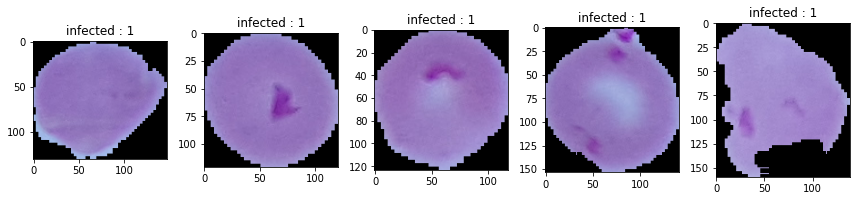

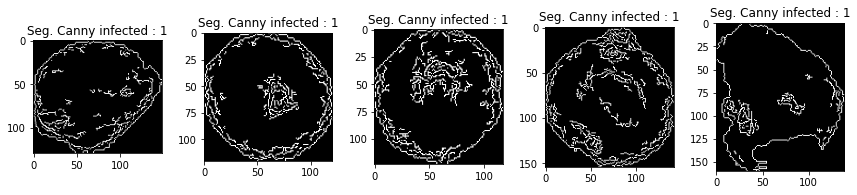

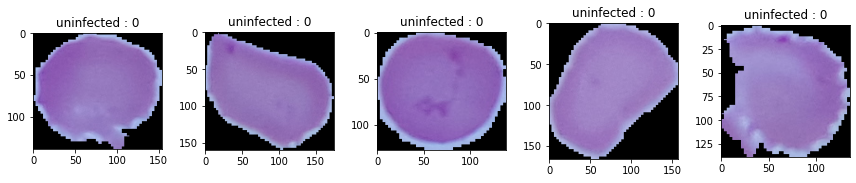

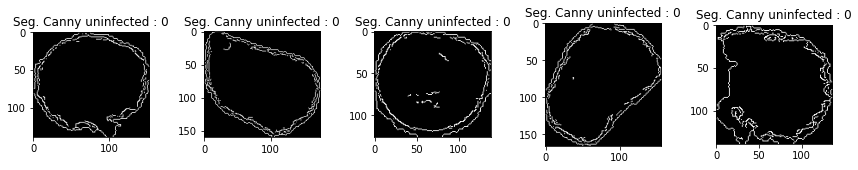

In [126]:
#Tahap Visualisasi Citra Malaria Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img, 80, 30)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()


#Tahap Visualisasi Citra Malaria Tidak Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img, 80, 30)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [55]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Target']])

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,0,0)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,0,0)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

array([['H1', 'H2', 'H3', ..., 'H6', 'H7', 'Target'],
       ['0.0018535693622652367', '1.1557500330913325e-07',
        '8.833029084530054e-11', ..., '-4.7352183413790935e-16',
        '-3.484742613783376e-24', '1.0'],
       ['0.0018601452455276983', '2.3944998285420457e-08',
        '9.802701849175522e-13', ..., '1.1508154751526062e-16',
        '-7.1625855921383015e-25', '1.0'],
       ...,
       ['0.002095807491660053', '6.528878769569246e-07',
        '6.267399871746091e-10', ..., '2.7374676193756846e-14',
        '1.3516956055231911e-20', '0.0'],
       ['0.0018808988276980388', '3.3195840312155335e-07',
        '1.5485395214315234e-11', ..., '7.410360932339203e-16',
        '4.192374979261002e-24', '0.0'],
       ['0.0018685497197751936', '3.602351176743675e-08',
        '2.2720724840905348e-10', ..., '8.70266032746542e-16',
        '1.3120478980148485e-22', '0.0']], dtype='<U32')

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DatasetMalaria5050.csv", x, fmt='%s',delimiter=',' )

In [0]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DatasetMalaria5050.csv')
print (len(dataset))
print (dataset)

1000
           H1        H2            H3  ...            H6            H7  Target
0    0.026648  0.000027  1.191604e-07  ...  5.928042e-09  3.781406e-13     1.0
1    0.014957  0.000005  2.160386e-08  ...  2.528009e-10  5.082177e-15     1.0
2    0.014479  0.000006  1.128404e-07  ...  4.062571e-10 -1.510320e-14     1.0
3    0.019210  0.000056  6.675118e-08  ...  8.208133e-10 -1.293234e-14     1.0
4    0.020044  0.000003  9.027330e-07  ...  7.334498e-10 -5.774392e-14     1.0
..        ...       ...           ...  ...           ...           ...     ...
995  0.023025  0.000034  1.234066e-06  ...  1.254879e-09 -9.584874e-14     0.0
996  0.017575  0.000003  1.555579e-09  ... -3.142333e-11 -3.365267e-17     0.0
997  0.016321  0.000024  1.071161e-07  ...  3.645080e-11 -9.062446e-17     0.0
998  0.019665  0.000011  2.716059e-08  ...  2.790508e-10  2.192619e-15     0.0
999  0.020192  0.000006  7.381005e-08  ...  6.818228e-10 -3.428541e-14     0.0

[1000 rows x 8 columns]


In [0]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 colmn msuk ke var (X)
y = dataset.iloc[:, 7] #hny colmn  index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.1)

print(len(y_test))
print(len(x_train))
print(len(dataset))
x

100
900
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.026648,0.000027,1.191604e-07,1.290919e-06,3.366857e-13,5.928042e-09,3.781406e-13
1,0.014957,0.000005,2.160386e-08,1.086173e-07,1.362152e-15,2.528009e-10,5.082177e-15
2,0.014479,0.000006,1.128404e-07,1.983889e-07,2.555341e-14,4.062571e-10,-1.510320e-14
3,0.019210,0.000056,6.675118e-08,1.773349e-07,-1.431819e-14,8.208133e-10,-1.293234e-14
4,0.020044,0.000003,9.027330e-07,7.282315e-07,-5.876206e-13,7.334498e-10,-5.774392e-14
...,...,...,...,...,...,...,...
995,0.023025,0.000034,1.234066e-06,2.190332e-07,6.148888e-14,1.254879e-09,-9.584874e-14
996,0.017575,0.000003,1.555579e-09,1.888927e-08,-9.670450e-17,-3.142333e-11,-3.365267e-17
997,0.016321,0.000024,1.071161e-07,9.069163e-09,-2.677479e-16,3.645080e-11,-9.062446e-17
998,0.019665,0.000011,2.716059e-08,9.126756e-08,3.980066e-15,2.790508e-10,2.192619e-15


1.0    456
0.0    444
Name: Target, dtype: int64
0.0    56
1.0    44
Name: Target, dtype: int64


Text(0.5, 1.0, 'testing')

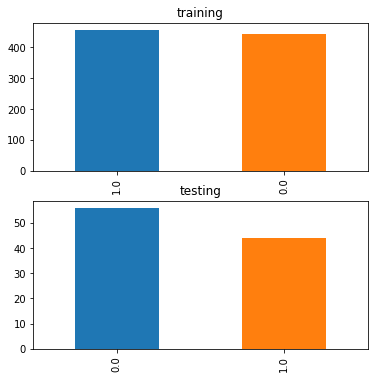

In [0]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(6,6)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-0.28146838,  0.58185782, -0.62333294, ...,  0.03800898,
        -0.16293499, -0.04094446],
       [-0.93199349, -0.5539157 ,  0.1941845 , ...,  0.25105863,
        -0.02172077,  0.57671005],
       [ 0.69146674, -0.63924332, -0.37934269, ...,  0.03222755,
        -0.32889213, -0.04942186],
       ...,
       [-1.36169947, -0.66619031, -0.61758026, ...,  0.03444234,
        -0.3134027 , -0.02284926],
       [-0.58191145,  0.2372234 , -0.30829696, ...,  0.02539219,
        -0.24446944, -0.00486387],
       [-0.80235049, -0.59658686, -0.56220586, ...,  0.22319934,
        -0.25658414, -0.00842151]])

In [0]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=4,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.])

In [0]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[49  7]
 [13 31]]
Akurasi : 0.8
presisi : [0.79032258 0.81578947]
recall : [0.875      0.70454545]
F-Measure : [0.83050847 0.75609756]


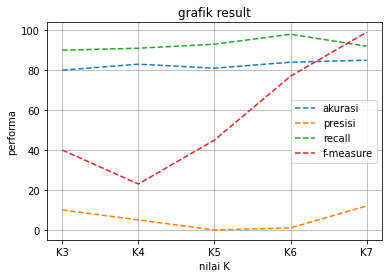

In [0]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7"]
a = [80, 83, 81, 84, 85]
p = [10, 5, 0, 1, 12]
r = [90, 91, 93, 98, 92]
f = [40, 23, 45, 77, 99]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result")
plt.xlabel("nilai K")
plt.ylabel("performa")
plt.legend(["akurasi", "presisi", "recall", "f-measure"])
plt.grid()
plt.show()